In [76]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import os


In [77]:
# Get current working directory
cwd = os.getcwd()
print(cwd)

/Users/siddharthbhaduri/Desktop/Work/Fall-2017/Google-Project/Week4


In [78]:
############ FUNCTIONS ##############
def mapping_county_to_region(county_name):
    return county_production_df[county_production_df['County'] == county_names.upper()]["Ag District"]

def edit_price_df(price_data):
    ordered_price_data = pd.DataFrame(index = price_data.index, columns = price_data.columns)
    row_index = 0;
    price_data_yearly_grouped = price_data.groupby("Year")
    for years in price_data["Year"].drop_duplicates():
        temp_df = price_data_yearly_grouped.get_group(years)
        for i in range(len(temp_df)):
            ordered_price_data.iloc[row_index] = temp_df.iloc[len(temp_df)-1-i]
            row_index += 1

    #ordered_price_data.to_csv(path + '/IL_Corn_Price.csv')
    return ordered_price_data

############### MAIN #################
# Files

county_name_file = "County_Names_IL.csv"
county_production_df = pd.read_csv(county_name_file)

weather_file = "weather_data.csv"
weather_df = pd.read_csv(weather_file)

# Weighted Average.
region_names = county_production_df["Ag District"].drop_duplicates()
grouped_df = county_production_df.groupby(["Ag District"])
weather_group_df = weather_df.groupby(["COUNTY"])

total_production = county_production_df["Value"].sum()
county_weight_df = pd.DataFrame(index=county_production_df["County"].drop_duplicates(), columns=["Weight"])

#for i in region_names:
    #print(grouped_df.get_group(i))

for county in county_weight_df.index:
    county_weight_df.loc[county] = (county_production_df[county_production_df["County"] == county]["Value"] / total_production).iloc[0]

for county in county_production_df["County"]:
    weather_group_df.get_group(county.lower())

for county in weather_df["COUNTY"]:
    weather_group_df.get_group(county.lower())

#weather_group_df.get_group(county)[weather_df.columns[4:]]    
    
year_month_columns = weather_group_df.get_group(weather_df["COUNTY"].iloc[0])[["YEAR", "MONTH"]]
averaged_weather_data = pd.DataFrame(0, index = range(len(year_month_columns)), columns = weather_df.columns[4:])

for county in weather_df["COUNTY"].drop_duplicates():
    temp_c =  (county.upper())
    temp = county_weight_df.loc[temp_c].iloc[0] 
    averaged_weather_data += weather_group_df.get_group(county)[weather_df.columns[4:]] 
    print (temp_c)
    print (averaged_weather_data)




MCLEAN
     TMP_HIGH    TMP_AVG  TMP_LOW  DP_HIGH     DP_AVG  DP_LOW  HUM_HIGH  \
0        41.0  24.935484      3.0     37.0  22.032258     1.0     100.0   
1        57.0  28.964286     -2.0     55.0  22.892857    -9.0     100.0   
2        59.0  36.225806     15.0     50.0  26.193548     5.0     100.0   
3        84.0  57.533333     28.0     68.0  42.566667    18.0     100.0   
4        89.0  63.935484     44.0     68.0  51.709677    23.0     100.0   
5        91.0  69.964286     48.0     73.0  57.857143    27.0     100.0   
6        95.0  75.967742     50.0     81.0  65.645161    36.0     100.0   
7        93.0  74.548387     57.0     77.0  64.806452    46.0     100.0   
8        89.0  64.033333     39.0     72.0  53.433333    18.0     100.0   
9        82.0  53.387097     32.0     66.0  42.258065    19.0     100.0   
10       71.0  49.666667     28.0     59.0  39.300000    19.0     100.0   
11       64.0  34.193548      6.0     59.0  28.967742     1.0     100.0   
12       60.0  33.

     TMP_HIGH  TMP_AVG  TMP_LOW  DP_HIGH  DP_AVG  DP_LOW  HUM_HIGH  HUM_AVG  \
0         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
1         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
2         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
3         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
4         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
5         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
6         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
7         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
8         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
9         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
10        NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
11        NaN      NaN      NaN      NaN     NaN    

DE KALB
     TMP_HIGH  TMP_AVG  TMP_LOW  DP_HIGH  DP_AVG  DP_LOW  HUM_HIGH  HUM_AVG  \
0         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
1         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
2         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
3         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
4         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
5         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
6         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
7         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
8         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
9         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
10        NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
11        NaN      NaN      NaN      NaN    

HAMILTON
     TMP_HIGH  TMP_AVG  TMP_LOW  DP_HIGH  DP_AVG  DP_LOW  HUM_HIGH  HUM_AVG  \
0         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
1         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
2         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
3         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
4         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
5         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
6         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
7         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
8         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
9         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
10        NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
11        NaN      NaN      NaN      NaN   

[192 rows x 22 columns]
SANGAMON
     TMP_HIGH  TMP_AVG  TMP_LOW  DP_HIGH  DP_AVG  DP_LOW  HUM_HIGH  HUM_AVG  \
0         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
1         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
2         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
3         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
4         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
5         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
6         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
7         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
8         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
9         NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
10        NaN      NaN      NaN      NaN     NaN     NaN       NaN      NaN   
11        NaN      

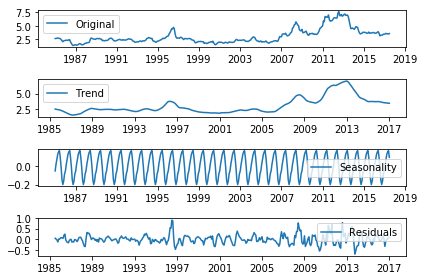

In [79]:
#######################Price data analysis#####################################
price_data = pd.read_csv('IL_Corn_Price.csv')

price_data = price_data.drop(price_data.columns[[0]], axis=1)
#price_data = edit_price_df(price_df)
#price_data

date_list = []

for i in range(len(price_data)):
    date_list.append(pd.to_datetime((str(price_data["Year"].iloc[i]) +"-"+ price_data["Period"].iloc[i]), infer_datetime_format=True).date())

price_processed = pd.DataFrame(data = price_data["Value"].values, columns = ["Value"])

for i in range(len(date_list)):
    date_list[i] = pd.Timestamp(date_list[i])

date_list
    
price_processed.index = date_list
price_processed

decomposition = seasonal_decompose(price_processed, freq = 12)  # monthly

price_trend = decomposition.trend
price_seasonal = decomposition.seasonal
price_residual = decomposition.resid

plt.subplot(411)
plt.plot(price_processed, label='Original')
plt.legend(loc='best')

#plt.show()


plt.subplot(412)
plt.plot(price_trend, label='Trend')
plt.legend(loc='best')

#plt.show()

plt.subplot(413)
plt.plot(price_seasonal, label='Seasonality')
plt.legend(loc='best')

#plt.show()

plt.subplot(414)
plt.plot(price_residual, label='Residuals')
plt.legend(loc='best')

#plt.show()


plt.tight_layout()
plt.show()
